<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Recommendation Systems Project

# Solution

- **DOMAIN:** Smartphone, Electronics
- **CONTEXT:** India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.
- **DATA DESCRIPTION:** 
 - author : name of the person who gave the rating
 - country : country the person who gave the rating belongs to
 - data : date of the rating
 - domain: website from which the rating was taken from
 - extract: rating content
 - language: language in which the rating was given
 - product: name of the product/mobile phone for which the rating was given
 - score: average rating for the phone
 - score_max: highest rating given for the phone
 - source: source from where the rating was taken
- **PROJECT OBJECTIVE:** We will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively.

In [1]:
# Import all the relevant libraries required to complete the analysis, visualization, modeling and presentation
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline

from scipy import stats
from scipy.stats import zscore

from surprise import Dataset,Reader
from surprise import NormalPredictor

from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import SVD, accuracy

from surprise import KNNWithMeans
from surprise import Prediction

import warnings
warnings.filterwarnings("ignore")

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

In [2]:
# CSV File 1
dfa1=pd.read_csv('Dataset/phone_user_review_file_1.csv',encoding='latin-1')

In [3]:
dfa1.info()
dfa1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374910 entries, 0 to 374909
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   phone_url  374910 non-null  object 
 1   date       374910 non-null  object 
 2   lang       374910 non-null  object 
 3   country    374910 non-null  object 
 4   source     374910 non-null  object 
 5   domain     374910 non-null  object 
 6   score      366691 non-null  float64
 7   score_max  366691 non-null  float64
 8   extract    371934 non-null  object 
 9   author     371641 non-null  object 
 10  product    374910 non-null  object 
dtypes: float64(2), object(9)
memory usage: 31.5+ MB


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [4]:
# CSV File 2
dfa2=pd.read_csv('Dataset/phone_user_review_file_2.csv',encoding='latin-1')

In [5]:
dfa2.info()
dfa2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114925 entries, 0 to 114924
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   phone_url  114925 non-null  object 
 1   date       114925 non-null  object 
 2   lang       114925 non-null  object 
 3   country    114925 non-null  object 
 4   source     114925 non-null  object 
 5   domain     114925 non-null  object 
 6   score      112166 non-null  float64
 7   score_max  112166 non-null  float64
 8   extract    113965 non-null  object 
 9   author     113290 non-null  object 
 10  product    114925 non-null  object 
dtypes: float64(2), object(9)
memory usage: 9.6+ MB


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [6]:
# CSV File 3
dfa3=pd.read_csv('Dataset/phone_user_review_file_3.csv',encoding='latin-1')

In [7]:
dfa3.info()
dfa3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312961 entries, 0 to 312960
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   phone_url  312961 non-null  object 
 1   date       312961 non-null  object 
 2   lang       312961 non-null  object 
 3   country    312961 non-null  object 
 4   source     312961 non-null  object 
 5   domain     312961 non-null  object 
 6   score      304933 non-null  float64
 7   score_max  304933 non-null  float64
 8   extract    310231 non-null  object 
 9   author     302173 non-null  object 
 10  product    312960 non-null  object 
dtypes: float64(2), object(9)
memory usage: 26.3+ MB


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [8]:
# CSV File 4
dfa4=pd.read_csv('Dataset/phone_user_review_file_4.csv',encoding='latin-1')

In [9]:
dfa4.info()
dfa4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98284 entries, 0 to 98283
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   phone_url  98284 non-null  object 
 1   date       98284 non-null  object 
 2   lang       98284 non-null  object 
 3   country    98284 non-null  object 
 4   source     98284 non-null  object 
 5   domain     98284 non-null  object 
 6   score      93706 non-null  float64
 7   score_max  93706 non-null  float64
 8   extract    96857 non-null  object 
 9   author     92696 non-null  object 
 10  product    98284 non-null  object 
dtypes: float64(2), object(9)
memory usage: 8.2+ MB


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [10]:
# CSV File 5
dfa5=pd.read_csv('Dataset/phone_user_review_file_5.csv',encoding='latin-1')

In [11]:
dfa5.info()
dfa5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350216 entries, 0 to 350215
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   phone_url  350216 non-null  object 
 1   date       350216 non-null  object 
 2   lang       350216 non-null  object 
 3   country    350216 non-null  object 
 4   source     350216 non-null  object 
 5   domain     350216 non-null  object 
 6   score      321983 non-null  float64
 7   score_max  321983 non-null  float64
 8   extract    341836 non-null  object 
 9   author     321351 non-null  object 
 10  product    350216 non-null  object 
dtypes: float64(2), object(9)
memory usage: 29.4+ MB


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [12]:
# CSV File 6
dfa6=pd.read_csv('Dataset/phone_user_review_file_6.csv',encoding='latin-1')

In [13]:
dfa6.info()
dfa6.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163837 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   phone_url  163837 non-null  object 
 1   date       163837 non-null  object 
 2   lang       163837 non-null  object 
 3   country    163837 non-null  object 
 4   source     163837 non-null  object 
 5   domain     163837 non-null  object 
 6   score      152165 non-null  float64
 7   score_max  152165 non-null  float64
 8   extract    160949 non-null  object 
 9   author     150780 non-null  object 
 10  product    163837 non-null  object 
dtypes: float64(2), object(9)
memory usage: 13.7+ MB


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


### 1A. Merge all the provided CSVs into one DataFrame.

In [14]:
# CSV File
dfa_list = [dfa1, dfa2, dfa3, dfa4, dfa5, dfa6]
dfa = pd.concat(dfa_list)

In [15]:
dfa.info()
dfa.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


### 1B. Explore, understand the Data and share at least 2 observations.

In [16]:
dfa.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


**Observations:**

- Feature score:
 - Mean and median are not equal. Skewness is expected.
 - Distribution is not normal because of big SD.
 - 75 % of values are less than 10, and maximum value is 10.
- Feature score_max:
 - Mean and median are equal. Distribution seems to be normal.
 - Range of values is small and constant.

### 1C. Round off scores to the nearest integers.

In [17]:
dfa['score'] = round(dfa['score'])

In [18]:
dfa.info()
dfa.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


### 1D. Check for missing values. Impute the missing values, if any.

In [19]:
dfa.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [20]:
# Replace missing values with mean
dfa['score_max'] = dfa['score_max'].fillna(dfa['score_max'].mean())

In [21]:
# Replace missing values with median
dfa['score'] = dfa['score'].fillna(dfa['score'].median())

In [22]:
# Drop the missing values
dfa.dropna(subset=['product'],inplace=True)

In [23]:
# Dataset after removing the missing values
dfa.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      19361
author       63201
product          0
dtype: int64

### 1E. Check for duplicate values and remove them, if any.

In [24]:
duplicates = dfa[dfa.duplicated(subset=['phone_url','date','lang','country','extract','author','product'])]
duplicates

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
342,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
343,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
371,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Tot nu toe in de eerste dagen weinig tot geen ...,Robin Winckens,Samsung Galaxy S8 Zwart
452,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Wat een huge scherm!,B Yapar,Samsung Galaxy S8 Zwart
3718,/cellphones/samsung-galaxy-s6-edgeplus/,10/4/2015,en,us,Amazon,amazon.com,10.0,10.0,"For readers, my opinions on this device (ATT 3...",FrozenCloud,"Samsung Galaxy S6 Edge+, Black 64GB (Verizon W..."
...,...,...,...,...,...,...,...,...,...,...,...
158568,/cellphones/samsung-sgh-2400/,7/21/2000,en,gb,Ciao,ciao.co.uk,6.0,10.0,The more expensive of the Samsung series but l...,cellnetsms,Samsung SGH 2400
158911,/cellphones/samsung-sgh-600/,4/30/2015,tr,tr,Cepworld,cepworld.com,9.0,10.0,varsa satan 05312614607,muhsin,Samsung (936) SGH-600
159375,/cellphones/alcatel-ot-easy/,11/13/2009,es,es,Dooyoo,dooyoo.es,6.0,10.0,en la opi,NaN,Alcatel One Touch Easy
160164,/cellphones/philips-genie-2000/,8/20/2000,it,it,Ciao,ciao.it,8.0,10.0,"Il Genie e' un buon telefono, scorrimente del ...",tonyblack,Philips Genie 2000


In [25]:
dfa.duplicated(subset=['phone_url','date','lang','country','extract','author','product']).sum()

8678

In [26]:
dfa.drop_duplicates(subset=['phone_url','date','lang','country','extract','author','product'],keep='first',inplace=True)
dfa.duplicated(subset=['phone_url','date','lang','country','extract','author','product']).sum()

0

### 1F. Keep only 1 Million data samples. Use random state=612.

In [27]:
dfa = dfa.sample(n=1000000, random_state=612)
dfa.shape

(1000000, 11)

In [28]:
dfa.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
46198,/cellphones/nokia-6600-slide/,6/18/2009,ru,ua,Mob.org,mob.ua,6.0,10.0,NaN,ÐÐ°ÑÑ.Ñ,Nokia 6600i Slide
216456,/cellphones/lenovo-moto-g4-plus/,4/9/2017,de,de,Amazon,amazon.de,10.0,10.0,Gutes Smartphone zu einem gÃ¼nstigen Preis. Gu...,Alex H,"Lenovo Moto G4 Plus Smartphone (14 cm (5,5 Zol..."
147812,/cellphones/sharp-gx10/,5/6/2004,de,de,Ciao,ciao.de,6.0,10.0,Die Vorgeschichte: Letztes Jahr im November ha...,Delorion,Sharp GX10
98325,/cellphones/samsung-galaxy-s6/,1/5/2016,en,us,Samsung,samsung.com,10.0,10.0,I did extensive research between the iPhone an...,LoveMySamsung7301,Samsung Galaxy S6 32GB (Cricket)
245296,/cellphones/sony-xperia-sp/,7/20/2015,de,de,Amazon,amazon.de,2.0,10.0,"Mit Abstand das schlechteste Handy, das ich je...",AmazonCruiser,"Sony Xperia SP Smartphone (11,7 cm (4,6 Zoll) ..."


### 1G. Drop irrelevant features. Keep features like Author, Product, and Score.

In [29]:
dfa_final = dfa[['author','product','score']]

In [30]:
dfa_final.info()
dfa_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 46198 to 177200
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   author   956018 non-null   object 
 1   product  1000000 non-null  object 
 2   score    1000000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 30.5+ MB


,author,product,score
46198,ÐÐ°ÑÑ.Ñ,Nokia 6600i Slide,6.0
216456,Alex H,"Lenovo Moto G4 Plus Smartphone (14 cm (5,5 Zol...",10.0
147812,Delorion,Sharp GX10,6.0
98325,LoveMySamsung7301,Samsung Galaxy S6 32GB (Cricket),10.0
245296,AmazonCruiser,"Sony Xperia SP Smartphone (11,7 cm (4,6 Zoll) ...",2.0


In [31]:
dfa_final.shape

(1000000, 3)

## 2. Answer the following questions.

### 2A. Identify the most rated products.

In [32]:
dfa_final.groupby('product')['score'].count().sort_values(ascending=False).head()  

product
Lenovo Vibe K4 Note (White,16GB)     3681
Lenovo Vibe K4 Note (Black, 16GB)    3106
OnePlus 3 (Graphite, 64 GB)          2896
OnePlus 3 (Soft Gold, 64 GB)         2523
Samsung Galaxy Express I8730         1875
Name: score, dtype: int64

### 2B. Identify the users with most number of reviews.

In [33]:
dfa_final.groupby('author')['score'].count().sort_values(ascending=False).head() 

author
Amazon Customer    54621
Cliente Amazon     13670
e-bit               6025
Client d'Amazon     5461
Amazon Kunde        3387
Name: score, dtype: int64

### 2C. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [34]:
dfa_final_products = pd.DataFrame(dfa_final.groupby('product').count())
filter1 = dfa_final_products['author'] > 50
filter2 = dfa_final_products['score'] > 50
dfa_final_products.where(filter1 & filter2, inplace=False).dropna().shape

(4096, 2)

In [35]:
dfa_final_products.where(filter1 & filter2, inplace=False).dropna().head(20)

,author,score
product,,
3100 / 3120,55.0,55.0
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),78.0,78.0
6126 / 6131 / 6133,88.0,88.0
6682 / 6681,63.0,65.0
"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)",58.0,58.0
"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)",60.0,60.0
"AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)",185.0,185.0
"AICEK Coque Samsung Galaxy J3 2016, AICEK Etui Silicone Gel Samsung Galaxy J3 2016 (J320F) Housse Antichoc Samsung J3 Transparente Souple Coque De Protection Pour Samsung Galaxy J3 2016 (5,0 Pouces)",66.0,66.0
"APPLE iPhone 6s Plus - 128 GB, Rose Gold",112.0,112.0


### 2D. Report your findings and inferences.

<AxesSubplot:xlabel='score', ylabel='count'>

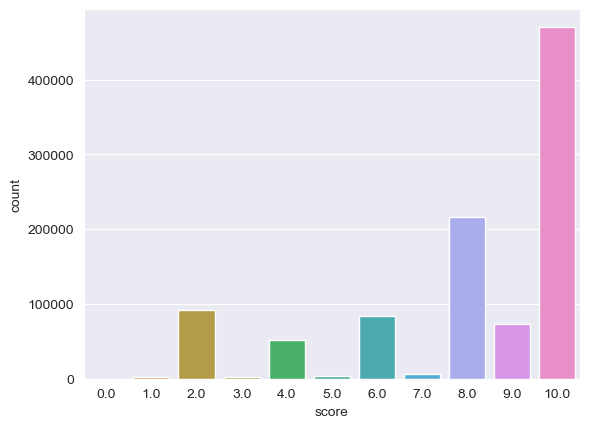

In [36]:
sns.countplot(dfa_final['score'])

**Observations:**
* Most common scores are 8 and 10. Most of the users provided rating on higher end
* Some higher scores can be seen for certain scores like 2, 4, 6, 8, 10. 
* Note the pattern of even numbers for higher ratings.
* Collaborative Filtering Model can be used to provide recommendations to the users.

## 3. Build a popularity based model and recommend top 5 mobile phones.

In [37]:
ratings_mean_count = pd.DataFrame(dfa_final.groupby('product')['score'].mean()) 

In [38]:
ratings_mean_count['rating_counts'] = pd.DataFrame(dfa_final.groupby('product')['score'].count())  

In [39]:
ratings_mean_count.head()

,score,rating_counts
product,,
"'Smartphone Meizu Pro 5, 5,7 pouces avec Exynos 7420 Octa 8 Core Processeur. mÃ©moire RAM 4 Go et 64 Go mÃ©moire...",8.0,1
"'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.0,1
"'Sony Xperia X (F5122) â rosa â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.0,1
"(7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;blanc)-Smartphone",6.0,1
"(CUBOT) GT88 5.5"" qHD 1.3GHz MTK6572 2-Core Android 4.2.2 3G Phone 8MP CAM 512MB RAM 4GB ROM",8.0,1


In [40]:
ratings_mean_count['top 5 mobile phones'] = ratings_mean_count['rating_counts'] * ratings_mean_count['score']

In [41]:
# Top 5 mobile phones recommendation
ratings_mean_count.sort_values(by='top 5 mobile phones', ascending=False).head(5)

,score,rating_counts,top 5 mobile phones
product,,,
"Lenovo Vibe K4 Note (White,16GB)",7.186634,3681,26454.0
"OnePlus 3 (Graphite, 64 GB)",8.698895,2896,25192.0
"Lenovo Vibe K4 Note (Black, 16GB)",7.227946,3106,22450.0
"OnePlus 3 (Soft Gold, 64 GB)",8.514467,2523,21482.0
Samsung Galaxy Express I8730,9.008000,1875,16890.0


## 4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model.

In [42]:
reader = Reader(rating_scale=(1, 10))

In [43]:
dfa_final.shape

(1000000, 3)

In [44]:
# Selecting a sample to manage the memory issues
dfa_final = dfa_final.sample(n=5000,random_state=0)

In [45]:
data = Dataset.load_from_df(dfa_final[['author','product','score']], reader = reader)

In [46]:
data.df

,author,product,score
173578,Ð®ÑÐ¸Ð¹,Ð¢ÐµÐ»ÐµÑÐ¾Ð½ SAMSUNG S5690 Galaxy Xcover Tit...,10.0
10698,infatuation,Sony Ericsson S500i,8.0
63723,Anna D??ullary,"Samsung S7710 Galaxy Xcover 2 Smartphone (10,2...",4.0
258608,Durga Das Lawadia,Micromax Canvas 4 A210 (White),10.0
275168,V.Ganapathi,Nokia 2730 Classic,2.0
...,...,...,...
97414,joyceelias,Motorola Smartphone Motorola RAZR i Branco - T...,10.0
15516,chris.k,Microsoft Nokia 6230i silber Handy,8.0
305153,marco,"Asus ZenFone 2 Laser Smartphone, Display da 5""...",10.0
213706,S. Carlson,Sharp FX STX-2 Unlocked GSM Slider Phone with ...,8.0


### First Using SVD

In [47]:
# Using SVD
svd_model = SVD()

X, y = train_test_split(data, test_size=0.25, random_state=0)

In [48]:
svd_model.fit(X)

y_pred = svd_model.test(y)
accuracy.rmse(y_pred)

RMSE: 2.6047


2.6047016764036384

In [49]:
y_pred

[Prediction(uid='F Vossen', iid='Samsung Galaxy Note 3 zwart / 32 GB - Overzicht', r_ui=9.0, est=8.46081540919035, details={'was_impossible': False}),
 Prediction(uid=nan, iid='Nokia Lumia 920', r_ui=10.0, est=5.136911127215607, details={'was_impossible': False}),
 Prediction(uid='Julia Dietz', iid='Microsoft Nokia 5228 Smartphone (8,1 cm (3,2 Zoll) Display, Touchscreen, 2 Megapixel Kamera) weiÃ\x9f/silber', r_ui=10.0, est=8.016266666666667, details={'was_impossible': False}),
 Prediction(uid='Juan JesÃºs DÃ\xadaz Ramos', iid='Sony Xperia M2 - Smartphone libre Android (Pantalla 4.8", cÃ¡mara 8 Mp, 8 GB, Quad-Core 1.2 GHz, 1024 MB RAM), pÃºrpura (importado)', r_ui=8.0, est=7.9986479762392095, details={'was_impossible': False}),
 Prediction(uid='eduardo', iid='Smartphone LG G3 D855', r_ui=10.0, est=8.136267835783602, details={'was_impossible': False}),
 Prediction(uid='Gerhard KrÃ¼ger', iid='Samsung Star S5230 Smartphone (Touchscreen, 3MP Kamera, Video, MP3-Player, Bluetooth) black gold'

In [50]:
test_pred_df = pd.DataFrame([[x.uid, x.iid, x.est] for x in y_pred])

In [51]:
test_pred_df.head()

,0,1,2
0,F Vossen,Samsung Galaxy Note 3 zwart / 32 GB - Overzicht,8.460815
1,NaN,Nokia Lumia 920,5.136911
2,Julia Dietz,"Microsoft Nokia 5228 Smartphone (8,1 cm (3,2 Z...",8.016267
3,Juan JesÃºs DÃ­az Ramos,Sony Xperia M2 - Smartphone libre Android (Pan...,7.998648
4,eduardo,Smartphone LG G3 D855,8.136268


### Build a collaborative filtering model using kNNWithMeans from surprise.

In [52]:
# User Based Model
knn_model_user = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})

knn_model_user.fit(X)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [53]:
# Item Based Model
knn_model_item = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})

knn_model_item.fit(X)

Computing the cosine similarity matrix...
Done computing similarity matrix.


## 5. Evaluate the collaborative model. Print RMSE value.

In [54]:
y_pred_user = knn_model_user.test(y)
y_pred_item = knn_model_item.test(y)

In [55]:
print("User-based Model : Accuracy RMSE)")
accuracy.rmse(y_pred_user)

User-based Model : Accuracy RMSE)
RMSE: 2.6201


2.6200521164944615

In [56]:
print("Item-based Model : Accuracy RMSE)")
accuracy.rmse(y_pred_item)

Item-based Model : Accuracy RMSE)
RMSE: 2.6400


2.6399818947438485

In [57]:
# User based model test prediction output
test_pred_user_df = pd.DataFrame([[x.uid, x.iid, x.est] for x in y_pred_user])
test_pred_user_df.head(5)

,0,1,2
0,F Vossen,Samsung Galaxy Note 3 zwart / 32 GB - Overzicht,8.016267
1,NaN,Nokia Lumia 920,7.039244
2,Julia Dietz,"Microsoft Nokia 5228 Smartphone (8,1 cm (3,2 Z...",8.016267
3,Juan JesÃºs DÃ­az Ramos,Sony Xperia M2 - Smartphone libre Android (Pan...,8.016267
4,eduardo,Smartphone LG G3 D855,8.016267


In [58]:
# Item based model test prediction output
test_pred_item_df = pd.DataFrame([[x.uid, x.iid, x.est] for x in y_pred_item])
test_pred_item_df.head(5)

,0,1,2
0,F Vossen,Samsung Galaxy Note 3 zwart / 32 GB - Overzicht,8.016267
1,NaN,Nokia Lumia 920,8.454000
2,Julia Dietz,"Microsoft Nokia 5228 Smartphone (8,1 cm (3,2 Z...",8.016267
3,Juan JesÃºs DÃ­az Ramos,Sony Xperia M2 - Smartphone libre Android (Pan...,8.016267
4,eduardo,Smartphone LG G3 D855,8.016267


## 6. Predict score (average rating) for test users.

In [59]:
# Predict score for one sample test user
knn_model_user.predict(uid="F Vossen",iid="Samsung Galaxy Note 3 zwart / 32 GB - Overzicht")

Prediction(uid='F Vossen', iid='Samsung Galaxy Note 3 zwart / 32 GB - Overzicht', r_ui=None, est=8.016266666666667, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [60]:
# Predicted value for all test users
y_pred_user

[Prediction(uid='F Vossen', iid='Samsung Galaxy Note 3 zwart / 32 GB - Overzicht', r_ui=9.0, est=8.016266666666667, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=nan, iid='Nokia Lumia 920', r_ui=10.0, est=7.039244186046512, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='Julia Dietz', iid='Microsoft Nokia 5228 Smartphone (8,1 cm (3,2 Zoll) Display, Touchscreen, 2 Megapixel Kamera) weiÃ\x9f/silber', r_ui=10.0, est=8.016266666666667, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Juan JesÃºs DÃ\xadaz Ramos', iid='Sony Xperia M2 - Smartphone libre Android (Pantalla 4.8", cÃ¡mara 8 Mp, 8 GB, Quad-Core 1.2 GHz, 1024 MB RAM), pÃºrpura (importado)', r_ui=8.0, est=8.016266666666667, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='eduardo', iid='Smartphone LG G3 D855', r_ui=10.0, est=8.016266666666667, details={'was_impossible': True, 'r

## 7. Report your findings and inferences.

In [61]:
# Please refer the 2D above for details

## 8. Try and recommend top 5 products for test users.

In [62]:
df_pred = pd.DataFrame(y_pred_user)

In [63]:
# Function to return recommended products based on user and number of recommendations, n
def recommendations(user, n):
    recommended_products = df_pred[df_pred['uid'] == user][['uid','iid','est']].sort_values('est', ascending=False).head(n)
    return recommended_products

In [64]:
# Recommend top 5 products
recommendations('Amazon Customer',5)

,uid,iid,est
1050,Amazon Customer,Samsung Guru GT-E1200 (Indigo Blue),8.548544
663,Amazon Customer,Sony Mobile Xperia SP Smartphone dÃ©bloquÃ© US...,8.016267
916,Amazon Customer,HTC One (Glacial Silver) 32GB unlocked,8.016267
576,Amazon Customer,Apple iPhone 6s Plus Unlocked GSM 4G LTE Smart...,8.016267
1100,Amazon Customer,captcha Asus Zenfone 2 Laser ZE500KLÃ Compati...,8.016267


In [65]:
recommendations('Cliente Amazon',5)

,uid,iid,est
242,Cliente Amazon,Lenovo Moto G4 - Smartphone libre Android (5.5...,8.651163
105,Cliente Amazon,"Cubot X9 Smartphone 3G - 5,0 pollici IPS, Andr...",8.016267
151,Cliente Amazon,"LG Leon H320 Smartphone, Memoria 8 GB, Bianco ...",8.016267
504,Cliente Amazon,"Huawei G8 - Smartphone libre de 5.5"" (Qualcomm...",8.016267
567,Cliente Amazon,Samsung Galaxy J7 - Smartphone libre Android (...,8.016267


In [66]:
recommendations('e-bit',5)

,uid,iid,est
108,e-bit,Smartphone Samsung Galaxy S4 Mini GT-I9192,8.947368
727,e-bit,Smartphone Samsung Galaxy S5 SM-G900,8.947368
898,e-bit,Smartphone Motorola Moto E 2Âª GeraÃ§Ã£o XT151...,8.947368
340,e-bit,LG K4 K130,8.016267
650,e-bit,Celular Nokia C2-01,8.016267


## 9. Try other techniques (Example: cross validation) to get better results.

In [67]:
# Detect outliers and impute them as required.

<AxesSubplot:>

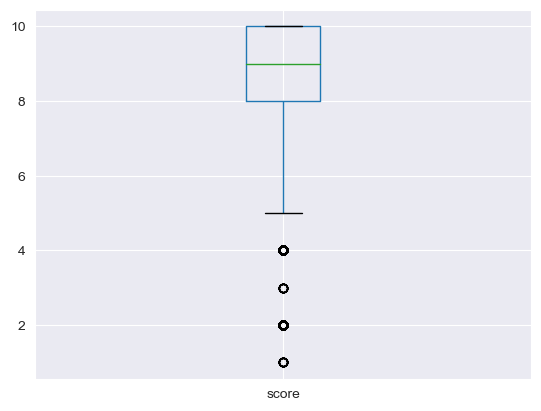

In [68]:
dfa_final.boxplot()

In [69]:
Q1 = np.percentile(dfa_final['score'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(dfa_final['score'], 75, interpolation = 'midpoint') 
Q1, Q3

(8.0, 10.0)

In [70]:
IQR = Q3 - Q1
max_range = Q3 + (IQR * 1.5)
min_range = Q1 - (IQR * 1.5)
min_range, max_range

(5.0, 13.0)

In [71]:
dfa_final[dfa_final['score'] > 13]

,author,product,score


In [72]:
dfa_final[dfa_final['score'] < 5]

,author,product,score
63723,Anna D??ullary,"Samsung S7710 Galaxy Xcover 2 Smartphone (10,2...",4.0
275168,V.Ganapathi,Nokia 2730 Classic,2.0
55,Peter griffin,Samsung Galaxy Star Pro GT-S7262 (White),2.0
153114,Paddy119,LG Electronics GM360 Viewty Plus Smartphone (7...,4.0
251885,ÐÐ°Ð»Ð´Ð¸Ð½Ð° Ð®Ð»Ð¸Ñ,Alcatel Idol Alpha,2.0
...,...,...,...
6783,K. Cavaretta,Sony Xperia Z3 UK SIM-Free Smartphone - Copper,2.0
225158,Uwe Richter,Microsoft Nokia 225 Dual-SIM Handy (GSM-Dualba...,4.0
207216,Andrea,"LG Nexus 5X Smartphone, Display Touch da 5,2"" ...",2.0
300351,NINGUINHO10,Motorola V8 Gold,4.0


In [73]:
dfa_final_new = dfa_final.copy()
dfa_final_new.loc[dfa_final_new['score'] < 5.0, 'score'] = 5.0

<AxesSubplot:>

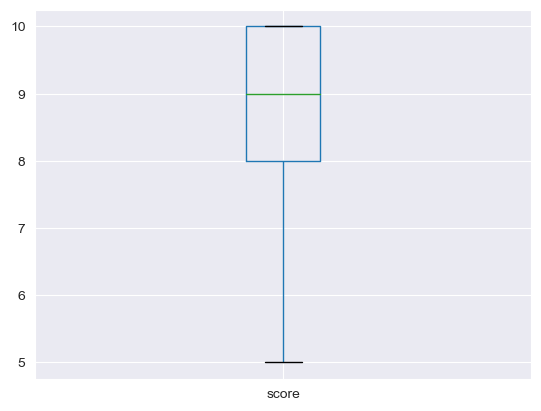

In [74]:
dfa_final_new.boxplot()

In [75]:
dfa_final_new = dfa_final_new.sample(n=5000,random_state=42)

In [76]:
data_new = Dataset.load_from_df(dfa_final_new[['author','product','score']], reader = reader)

In [77]:
svd_model_new = SVD ()

X_train, y_test = train_test_split(data_new,test_size=0.25,random_state=42)

In [78]:
svd_model_new.fit(X_train)

In [79]:
y_pred_new = svd_model_new.test(y_test)
accuracy.rmse(y_pred_new)

RMSE: 1.8098


1.8098220534359593

In [80]:
# Using cross validation techniques

In [81]:
cross_validate(svd_model_new, data_new, measures=['RMSE', 'MAE'], cv=5, verbose=True, n_jobs=1)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.8530  1.8635  1.9293  1.8507  1.8658  1.8725  0.0290  
MAE (testset)     1.5845  1.5940  1.6496  1.5715  1.5925  1.5984  0.0268  
Fit time          0.09    0.06    0.08    0.10    0.06    0.08    0.02    
Test time         0.01    0.00    0.01    0.01    0.00    0.01    0.00    


{'test_rmse': array([1.85300006, 1.86354974, 1.92925095, 1.85074024, 1.8658018 ]),
 'test_mae': array([1.58448041, 1.59396618, 1.64963551, 1.5715099 , 1.59249617]),
 'fit_time': (0.08953523635864258,
  0.05501294136047363,
  0.08207893371582031,
  0.09625434875488281,
  0.05826258659362793),
 'test_time': (0.00792837142944336,
  0.004987239837646484,
  0.0050029754638671875,
  0.008925437927246094,
  0.0049974918365478516)}

## 10. In what business scenario you should use popularity based Recommendation Systems ?

It is a type of recommendation system which works on the principle of popularity and/or anything which is in trend. These systems check about the product or movie which are in trend or are most popular among the users and directly recommend those.

- It does not suffer from cold start problems which means on day 1 of the business we can recommend products to various users based on different filters.

- There is no need for the user's historical data.

- Recommendations are not personalized. The system would recommend the same sort of products/movies which are based upon popularity to all users.

Examples: Google News-News filtered by trending and most popular news; YouTube-Trending videos suggestions.

## 11. In what business scenario you should use CF based Recommendation Systems ?

This is considered as one of the very smart recommendation systems that works on the similarity between different users and also items that are widely used as in e-commerce websites and online movie websites. It examines about the taste of similar users and does recommendations. 

The similarity is not restricted to the taste of the users only there can be considerations of similarity between different items also. The system will give more efficient recommendations if we have a large volume of information about users and items.

Main categories: User-based CF(neighborhood), Item-based CF(neighborhood), Latent matrix Factorization (SVD)

Use cases: eCommerce Websites, music, new connection recommendations from Amazon, Last.fm, Spotify, LinkedIn, and Twitter

## 12. What other possible methods can you think of which can further improve the recommendation for different users ?

**Other possible methods:**
- Content Based Recommendation systems
- Classification Model based
- Association Rule Mining

**Hybrid Approaches:** 
Each recommendation engine has a central idea and solves the problem of predicting the unseen user-item rating through a unique approach. Each recommendation model has its own strengths and limitations, that is, each works better in specific data setting than others. Some recommenders are robust at handling the cold start problem, have model biases, and tend to overfit the training dataset. As in the case of the ensemble classifiers, hybrid recommenders combine the model output of multiple base recommenders into one hybrid recommender. 

As long as the base models are independent, this approach limits the generalization error, improves the performance of the recommender, and overcomes the limitation of a single recommendation technique. The diversity of the base models can be imparted by selecting different modeling techniques like neighborhood BMF, content-based and supervised
model-based recommenders.

# References:

1. [Towards Data Science](https://towardsdatascience.com)
2. [Kaggle. Kaggle Code](https://www.kaggle.com/code)
3. [KdNuggets](https://www.kdnuggets.com/)
4. [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/)
5. [Wikipedia](https://en.wikipedia.org/)
6. [Numpy](https://numpy.org/)
7. [Pandas](https://pandas.pydata.org/)
8. [SciPy](https://scipy.org/)
9. [MatplotLib](https://matplotlib.org/)
10. [Seaborn](https://seaborn.pydata.org/)
11. [Python](https://www.python.org/)
12. [Plotly](https://plotly.com/)
13. [Bokeh](https://docs.bokeh.org/en/latest/)
14. [RStudio](https://www.rstudio.com/)
15. [MiniTab](https://www.minitab.com/en-us/)
16. [Anaconda](https://www.anaconda.com/)
17. [Surprise Library](https://surpriselib.com/)
18. [Surprise Documentation](https://surprise.readthedocs.io/en/stable/)